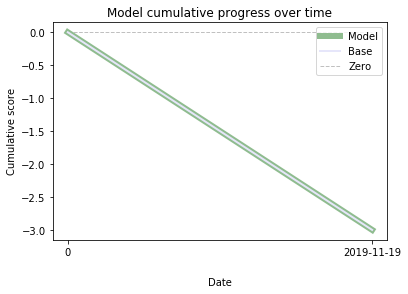

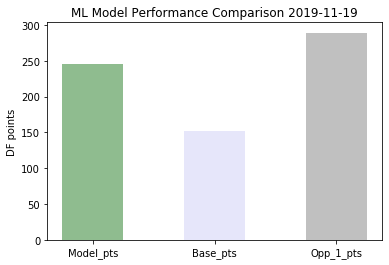

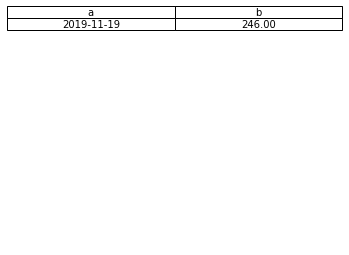

In [11]:
import pandas as pd
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatc
conn = sqlite3.connect('/NBA_db_2019_20.db') # Define own folder
today = datetime.today().strftime('%Y-%m-%d')

results_df = pd.read_sql_query("SELECT * FROM Fanteam_results", conn)
review_data_df = pd.read_sql_query("SELECT * FROM review_data", conn) # the DQ dictionary, latest entry

# Extract results from the SQL database
if results_df['1st'].iloc[-1] == 'UserName':
    model_pts = results_df['1st_pts'].iloc[-1]
    opp_1_pts = results_df['2nd_pts'].iloc[-1]
else: 
    model_pts = results_df['2nd_pts'].iloc[-1]
    opp_1_pts = results_df['1st_pts'].iloc[-1]
    
results_df.loc[results_df['1st'] == 'UserName', 'Model_progress'] = 1
results_df = results_df.replace(np.nan, -1)
results_df['Model_cum_progress'] = results_df['Model_progress'].cumsum()

# dictiorary takes up scraped results from FanTeam
dict_daily = {'No': len(results_df)+1,
              'Date': today,
              'Model_pts': model_pts,
              'Base_pts': review_data_df['Control_lineup_performance'],
              'Model_pred_pts': str(review_data_df['Total predicted DF points']),
              'Base_pred_pts': review_data_df['Total base predicted DF points'],
              'Opp_1_pts': opp_1_pts,
              'Model_wins': 0,
              'Base_wins': 0,
              'Model_cum_progress': results_df['Model_cum_progress'][-1]
              'Base_cum_progress': 
             }

# To calculate how many wins Model/Base/Random teams get  
if float(dict_daily['Model_pts']) > float(dict_daily['Opp_1_pts']):
    dict_daily['Model_wins'] += 1
if float(dict_daily['Base_pts']) > float(dict_daily['Opp_1_pts']):
    dict_daily['Base_wins'] += 1

results_df = pd.DataFrame(dict_daily)
results_df['Model_cum_progress'] = 
results_df['Base_cum_progress']

# Dataframe goes to SQL to append table with new data. Try/except to ignore error on date Unique constraint
try:
    results_df.to_sql('Progress', con=conn, if_exists='append', index=False)
except:
    pass

# Graph 2 
objects = ['Model_pts', 'Base_pts', 'Opp_1_pts']
array = results_df.loc[len(results_df)-1, objects].values
array_int = []
for i in array: # Need to convert all the items to integers for the plot
    array_int.append(int(float(i)))
x_pos = [num for num, _ in enumerate(objects)]
fig, ax2 = plt.subplots()
ax2.set_xticks(x_pos)
ax2.set_xticklabels(objects)
ax2.set_ylabel('DF points')
ax2.set_title(('ML Model Performance Comparison {}').format(today))
ax2.set_xticks(x_pos, objects)
ax2.bar(x_pos, array_int, color=['darkseagreen', 'lavender', 'silver', 'silver', 'silver'], width=0.5)
plt.savefig('Day_result_graph.png')

# Graph 4 - the results' table, needs information to be defined, what to show. 
fig, ax = plt.subplots()
ax.axis("off")
ax.table(cellText=results_df[['Date', 'Model_pts']].values,loc='top', fontsize=500, cellLoc='center', colLabels=['a', 'b'])
plt.savefig('Results_table.png')  

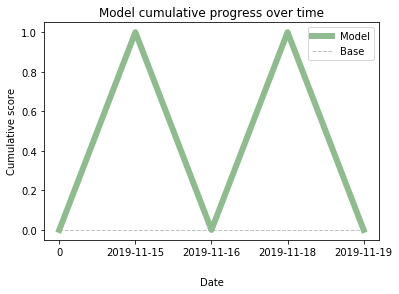

In [10]:
import numpy as np
results_df = pd.read_sql_query("SELECT * FROM Fanteam_results", conn) 
results_df.loc[results_df['1st'] == 'PauliusAA', 'Model_progress'] = 1
results_df = results_df.replace(np.nan, -1)
results_df['Model_cum_progress'] = results_df['Model_progress'].cumsum()

# Graph 1
# Add 0 at the beginning to serve as a reference point (and not start at today)
y_data = [0, *results_df.loc[:,'Date'].values.tolist()]
x_data_1 = [0, *results_df.loc[:,'Model_cum_progress'].values.tolist()]
#x_data_2 = [0, *results_df.loc[:,'Base_cum_progress'].values.tolist()]

plt.plot(y_data, x_data_1, color='darkseagreen', linewidth=6)
plt.hlines(0, 0, len(x_data_1)-1, color='silver', linewidth=1, linestyle='dashed')
plt.legend(['Model', 'Base', 'Zero'])
plt.title('Model cumulative progress over time')
plt.xlabel('Date', labelpad=20)
plt.ylabel('Cumulative score')
axes = plt.gca()
plt.savefig('Time_progress_graph.png')